<a href="https://colab.research.google.com/github/aakankshch/deeplearning/blob/main/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network model for CIFAR10 Dataset



In [35]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

In [4]:
#Loading the dataset and converting the pixel values
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
print(f'Dimension of X_train : {X_train.ndim}')
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {Y_train.shape}')
print(f'Shape of y_test : {Y_test.shape}')
print(f'Shape of 1st image: {X_train[0].shape}, {Y_train[0].shape}')

Dimension of X_train : 4
Shape of X_train : (50000, 32, 32, 3)
Shape of X_test : (10000, 32, 32, 3)
Shape of y_train : (50000, 1)
Shape of y_test : (10000, 1)
Shape of 1st image: (32, 32, 3), (1,)


**We have 50000 of training images and 10000 of test images**

In [14]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [13]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

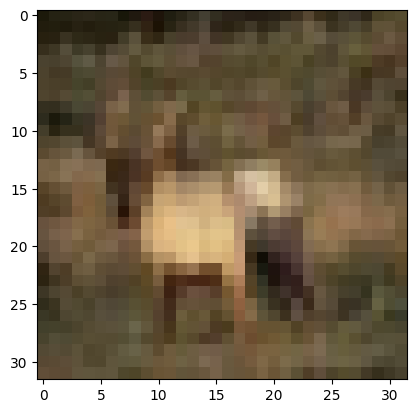

In [20]:
#Displaying the image
plt.imshow(X_train[3])

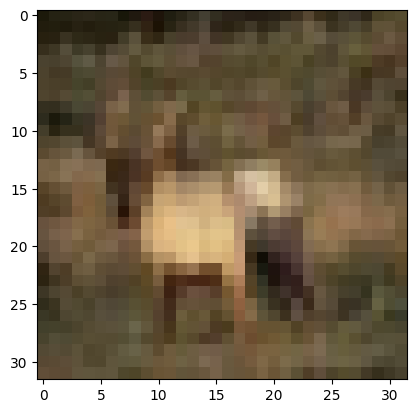

deer


In [18]:
# List of label strings for CIFAR10
label_str = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#label_str we can get from keras cifar10 dataset

img_id = 3
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label[0]])

In [26]:
#Converting categorical variables using One Hot Encoding
num_classes=10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [27]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Define the CNN model**

*   2 convolutional layers (each with 32 3x3 filters)
*   1 max pooling layer with a 2x2 filter
*   The resulting tensor is flattened into a vector
*   The flattened vector is put through an MLP with 1 hidden layer (128 hidden nodes)



In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3, 3), input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, kernel_size =(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))  #Activation is softmax when there are multiple outputs

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
#Fit the model
batch_size = 128
epochs = 15
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 4s 9ms/step - loss: 1.5491 - accuracy: 0.4452 - val_loss: 1.3180 - val_accuracy: 0.5320
Epoch 2/15
352/352 [==============================] - 2s 7ms/step - loss: 1.2164 - accuracy: 0.5730 - val_loss: 1.1332 - val_accuracy: 0.6062
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.0605 - accuracy: 0.6281 - val_loss: 1.0504 - val_accuracy: 0.6338
Epoch 4/15
352/352 [==============================] - 3s 7ms/step - loss: 0.9612 - accuracy: 0.6662 - val_loss: 1.0181 - val_accuracy: 0.6470
Epoch 5/15
352/352 [==============================] - 2s 7ms/step - loss: 0.8768 - accuracy: 0.6960 - val_loss: 0.9591 - val_accuracy: 0.6714
Epoch 6/15
352/352 [==============================] - 2s 7ms/step - loss: 0.8121 - accuracy: 0.7187 - val_loss: 0.9722 - val_accuracy: 0.6696
Epoch 7/15
352/352 [==============================] - 2s 7ms/step - loss: 0.7437 - accuracy: 0.7423 - val_loss: 0.9568 - val_accuracy: 0.6754
Epoch 

In [31]:
#Evaluating the MOdel
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
test_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 1.2967 - accuracy: 0.6587


0.6586999893188477

**Accuracy of the model is 65%%**

In [32]:
#Prediction using the model
y_pred_cnn=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
y_pred_classes_cnn=[np.argmax(element) for element in y_pred_cnn]